In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {}, x_test.shape : {}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {}, t_test.shape : {}'.format(t_train.shape, t_test.shape))

x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


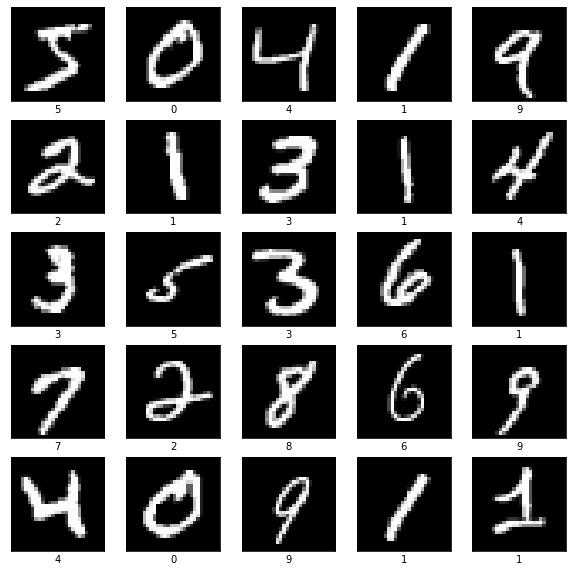

In [ ]:
# 데이터 출력
plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [ ]:
learning_rate = 0.001
epochs = 30
batch_size = 50

# Padding SAME

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),kernel_size=3, filters=32, activation='relu',padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(input_shape=(28,28,1),kernel_size=3, filters=32, activation='relu',padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(input_shape=(28,28,1),kernel_size=3, filters=32, activation='relu',padding='SAME'))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [ ]:
model.compile(optimizer=Adam(learning_rate), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
t_train.shape

(60000,)

In [ ]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, 
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(x_test,t_test)
)
end_time = datetime.now()

print('\n\nElapsed time =>', end_time - start_time)

Epoch 1/30
1200/1200 [==============================] - 10s 7ms/step - loss: 0.2197 - accuracy: 0.9309 - val_loss: 0.0538 - val_accuracy: 0.9837
Epoch 2/30
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0722 - accuracy: 0.9774 - val_loss: 0.0351 - val_accuracy: 0.9890
Epoch 3/30
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 4/30
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0446 - accuracy: 0.9856 - val_loss: 0.0365 - val_accuracy: 0.9894
Epoch 5/30
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.0250 - val_accuracy: 0.9912
Epoch 6/30
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0254 - val_accuracy: 0.9915
Epoch 7/30
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0287 - val_accurac

In [ ]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0267 - accuracy: 0.9932


[0.026721566915512085, 0.9932000041007996]

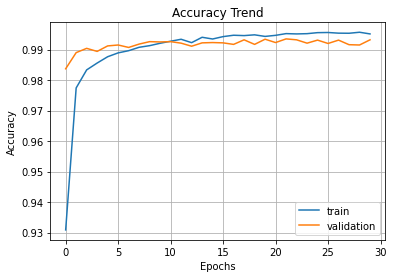

In [ ]:
plt.title('Accuracy Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend(loc='best')

plt.show()

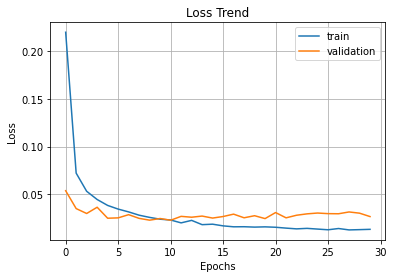

In [ ]:
plt.title('Loss Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend(loc='best')

plt.show()

# Padding Valid

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),kernel_size=3, filters=32, activation='relu',padding='VALID'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(input_shape=(28,28,1),kernel_size=3, filters=32, activation='relu',padding='VALID'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(input_shape=(28,28,1),kernel_size=3, filters=32, activation='relu',padding='VALID'))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 32)         

In [ ]:
model.compile(optimizer=Adam(learning_rate), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, 
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(x_test,t_test)
)
end_time = datetime.now()

print('\n\nElapsed time =>', end_time - start_time)

Epoch 1/30
1200/1200 [==============================] - 9s 7ms/step - loss: 0.2579 - accuracy: 0.9190 - val_loss: 0.0601 - val_accuracy: 0.9803
Epoch 2/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0833 - accuracy: 0.9744 - val_loss: 0.0402 - val_accuracy: 0.9869
Epoch 3/30
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0615 - accuracy: 0.9809 - val_loss: 0.0392 - val_accuracy: 0.9868
Epoch 4/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0299 - val_accuracy: 0.9895
Epoch 5/30
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0429 - accuracy: 0.9860 - val_loss: 0.0272 - val_accuracy: 0.9908
Epoch 6/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0387 - accuracy: 0.9874 - val_loss: 0.0338 - val_accuracy: 0.9892
Epoch 7/30
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0251 - val_accuracy:

In [ ]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0270 - accuracy: 0.9930


[0.027010083198547363, 0.9929999709129333]

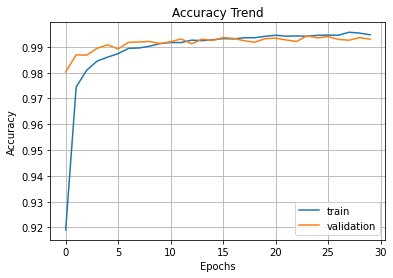

In [ ]:
plt.title('Accuracy Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend(loc='best')

plt.show()

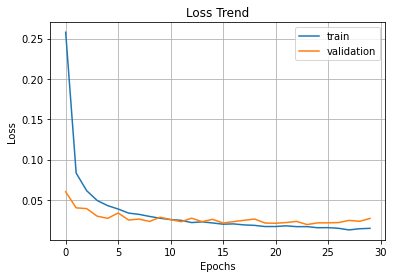

In [ ]:
plt.title('Loss Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend(loc='best')

plt.show()